In [85]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.tsa.api import ARDL
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np


In [86]:
df = pd.read_excel('../comparing_ir.xlsx',usecols=[1,3])
df.index = pd.date_range('2010-06','2022-04',freq='m')

df

,FED_Policy_Rate,RBI_Policy_Rate
2010-06-30,0.25,5.25
2010-07-31,0.25,5.25
2010-08-31,0.25,5.53
2010-09-30,0.25,5.75
2010-10-31,0.25,5.88
...,...,...
2021-11-30,0.25,4.00
2021-12-31,0.25,4.00
2022-01-31,0.25,4.00
2022-02-28,0.25,4.00


In [87]:
before_covid = df[(df.index <'2020-03')]
after_covid = df.iloc[112:142,:] 
print(f'n of post corona : {before_covid.shape}\nn of after corona : {after_covid.shape}')

n of post corona : (117, 2)
n of after corona : (30, 2)


In [88]:
model_post_corona,model_corona = sm.OLS(before_covid['RBI_Policy_Rate'],sm.add_constant(before_covid['FED_Policy_Rate'])),sm.OLS(after_covid['RBI_Policy_Rate'],sm.add_constant(after_covid['FED_Policy_Rate']))
results_post_corona,results_corona = model_post_corona.fit(),model_corona.fit()

results_post_corona.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        RBI_Policy_Rate   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     74.24
Date:                Tue, 17 May 2022   Prob (F-statistic):           4.27e-14
Time:                        00:11:34   Log-Likelihood:                -128.43
No. Observations:                 117   AIC:                             260.9
Df Residuals:                     115   BIC:                             266.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               7.4633      0.097     77.320      0.000       7.272       7.655
FED_Policy_Rate    -0.7672      0.089     -8.616      0.000      -0.944      -0.591
==============================================================================
Omnibus:                        4.662   Durbin-Watson:                   0.052
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                4.695
Skew:                          -0.460   Prob(JB):                       0.0956
Kurtosis:                       2.660   Cond. No.                         2.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

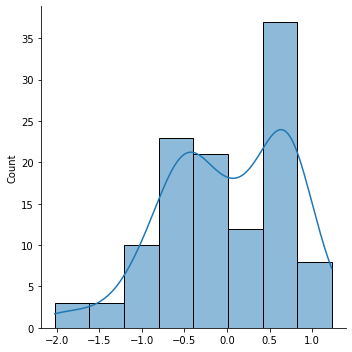

In [89]:
sns.displot(results_post_corona.resid,kde=True)

In [90]:
results_corona.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        RBI_Policy_Rate   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     425.3
Date:                Tue, 17 May 2022   Prob (F-statistic):           1.81e-18
Time:                        00:11:36   Log-Likelihood:                 24.637
No. Observations:                  30   AIC:                            -45.27
Df Residuals:                      28   BIC:                            -42.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.8398      0.027    141.009      0.000       3.784       3.896
FED_Policy_Rate     0.7446      0.036     20.623      0.000       0.671       0.819
==============================================================================
Omnibus:                       37.090   Durbin-Watson:                   0.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.274
Skew:                           2.618   Prob(JB):                     3.08e-24
Kurtosis:                      10.694   Cond. No.                         2.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
print(f'Heteroscedasticity P Values\n\n\n Post Corona : {sms.het_breuschpagan(results_post_corona.resid,results_post_corona.model.exog)[1]}\nAfter Corona : {sms.het_breuschpagan(results_corona.resid,results_corona.model.exog)[1]}')

Heteroscedasticity P Values


 Post Corona : 0.10386798412523357
After Corona : 0.4790893151943484


In [92]:
print(f'Durbin Watson & Breusch-Godfrey Autocorrelation P Values\n\n\nPost Corona BG : {sms.acorr_breusch_godfrey(results_post_corona,nlags=1)[1]}\nPost Corona Durbin-Watson : {sms.durbin_watson(results_post_corona.resid)}\n\nAfter Corona BG : {sms.acorr_breusch_godfrey(results_corona,nlags=5)[1]}\nAfter Corona Durbin-Watson : {sms.durbin_watson(results_corona.resid)}')

Durbin Watson & Breusch-Godfrey Autocorrelation P Values


Post Corona BG : 2.6786114265033556e-24
Post Corona Durbin-Watson : 0.05237047700300751

After Corona BG : 0.04533933050853786
After Corona Durbin-Watson : 0.9689086839577766


In [93]:
ardl_corona,ardl_post_corona = ARDL(after_covid['RBI_Policy_Rate'],1,sm.add_constant(after_covid['FED_Policy_Rate']),{'FED_Policy_Rate':1}),ARDL(before_covid['RBI_Policy_Rate'],[1,2],sm.add_constant(before_covid['FED_Policy_Rate']),{'FED_Policy_Rate':2})
results_corona,results_post_corona = ardl_corona.fit(),ardl_post_corona.fit()

c:\Users\acer\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\ardl\model.py:158: SpecificationWarning: exog contains variables that are missing from the order dictionary.  Missing keys: const.
  warnings.warn(msg, SpecificationWarning)
c:\Users\acer\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\ardl\model.py:158: SpecificationWarning: exog contains variables that are missing from the order dictionary.  Missing keys: const.
  warnings.warn(msg, SpecificationWarning)


In [94]:
results_corona.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARDL Model Results                              
==============================================================================
Dep. Variable:        RBI_Policy_Rate   No. Observations:                   30
Model:                     ARDL(1, 1)   Log Likelihood                  41.894
Method:               Conditional MLE   S.D. of innovations              0.057
Date:                Tue, 17 May 2022   AIC                            -73.788
Time:                        00:11:42   BIC                            -66.952
Sample:                    11-30-2019   HQIC                           -71.647
                         - 03-31-2022                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.8462      0.437      4.225      0.000       0.946       2.746
RBI_Policy_Rate.L1     0.5137      0.113      4.527      0.000       0.280       0.747
FED_Policy_Rate.L0     0.4840      0.045     10.738      0.000       0.391       0.577
FED_Policy_Rate.L1    -0.1107      0.094     -1.174      0.251      -0.305       0.083
======================================================================================
"""

In [95]:
results_corona.test_normality()

Jarque-Bera    7.743411e+01
P-value        1.532489e-17
Skewness      -2.864357e-01
Kurtosis       1.098469e+01
dtype: float64

In [96]:
exog_corona = sm.add_constant(after_covid['FED_Policy_Rate'])[1:]
sms.het_breuschpagan(results_corona.resid,exog_corona)[1]

0.5548177431937453

In [97]:
sms.durbin_watson(results_corona.resid)

2.8116031317976273

In [98]:
from sklearn.metrics import r2_score

endog_corona = after_covid['RBI_Policy_Rate'][1:]
r2_score(endog_corona,results_corona.fittedvalues)

0.9794903571311142

In [104]:
results_post_corona.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARDL Model Results                              
==============================================================================
Dep. Variable:        RBI_Policy_Rate   No. Observations:                  117
Model:                     ARDL(2, 2)   Log Likelihood                  64.129
Method:               Conditional MLE   S.D. of innovations              0.139
Date:                Tue, 17 May 2022   AIC                           -114.258
Time:                        00:18:20   BIC                            -95.044
Sample:                    08-31-2010   HQIC                          -106.459
                         - 02-29-2020                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4069      0.144      2.830      0.006       0.122       0.692
RBI_Policy_Rate.L1     1.1355      0.094     12.131      0.000       0.950       1.321
RBI_Policy_Rate.L2    -0.1872      0.091     -2.049      0.043      -0.368      -0.006
FED_Policy_Rate.L0     0.0766      0.169      0.453      0.652      -0.258       0.412
FED_Policy_Rate.L1     0.0761      0.243      0.313      0.755      -0.406       0.558
FED_Policy_Rate.L2    -0.2238      0.169     -1.325      0.188      -0.558       0.111
======================================================================================
"""

In [105]:
results_post_corona.test_heteroskedasticity(1)

,ARCH-LM,P-value,DF
Lag,,,
1,1.351196,0.245069,1


In [106]:
results_post_corona.test_normality()

Jarque-Bera    3.351668e+01
P-value        5.271630e-08
Skewness      -4.812600e-01
Kurtosis       5.463400e+00
dtype: float64

In [108]:
endog = before_covid['RBI_Policy_Rate'][2:]
exog = sm.add_constant(before_covid['RBI_Policy_Rate'])[2:]

r2_score(endog,results_post_corona.fittedvalues)

0.976989322861228

<AxesSubplot:>

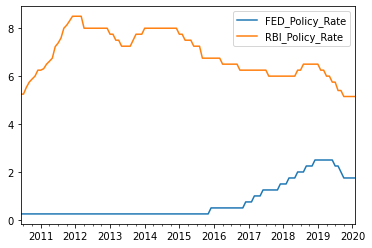

In [109]:
before_covid.plot()